# Classifier Example (Iris Dataset)
![](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

## Project Description
The Iris flower data set is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Based on the combination of these four features, developed a basic classifier to distinguish the species from each other.<br>
![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

## Libraries

In [2]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [3]:
# Data is available on Internet, and also on SeaBorn Library
Iris=sb.load_dataset('iris')

## Review Dataset

In [4]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Check How Many Categories

In [5]:
Iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Check Correlation between Variables

In [6]:
sb.heatmap(Iris.corr(), annot=True)

ValueError: could not convert string to float: 'setosa'

# Help from ChatGPT
I am a Data Scientist; and I want to check the Correlation between Variables in the example of Iris flowers. I have read the data into Python. Now, I am using the Seaborn library for finding the correlation, using this command: sb.heatmap(Iris.corr(), annot=True); but I am getting the following error; could you fix it and give me the correct command. ValueError: could not convert string to float: 'setosa'

<Axes: >

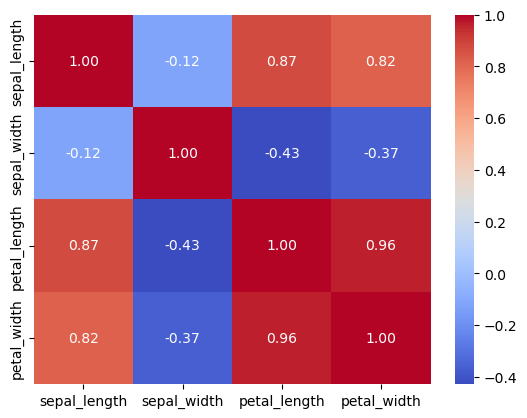

In [7]:
# Select only the numeric columns for correlation
numeric_columns = Iris.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')



### Check for Outlies

<Axes: xlabel='species', ylabel='sepal_length'>

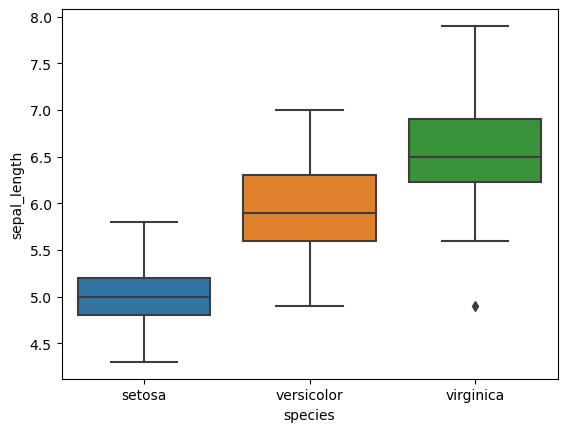

In [8]:
sb.boxplot(x='species', y='sepal_length', data=Iris)

How the data are divided into 4 Quartiles:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1100px-Boxplot_vs_PDF.svg.png)

# Help from ChatGPT
Awesome; it works perfectly. Now, I try to remove the outliers. First to visualize the data, I used the following command and I was successful. Now, could you help me with the code to remove the outliers. sb.boxplot(x='species', y='sepal_length', data=Iris)

##### <font color='red'> ??? find out, how you may remove the one outlier in Virginica! 

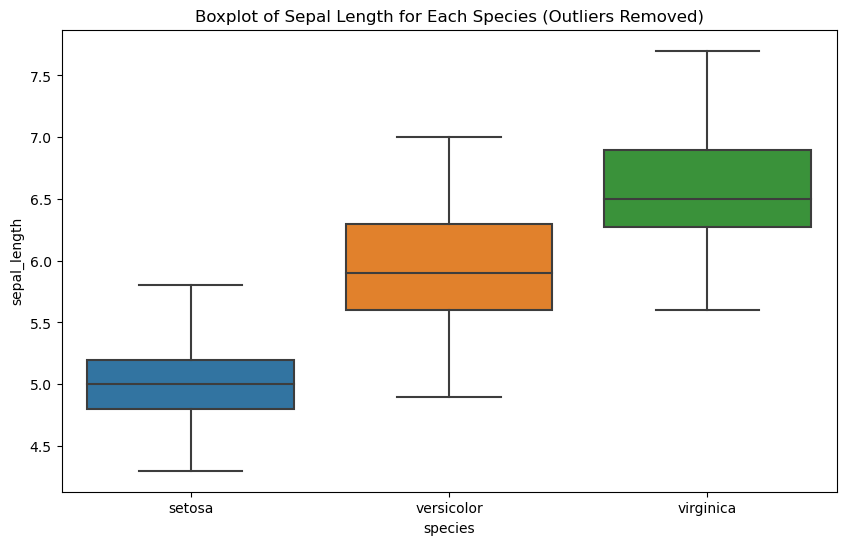

In [10]:
# Calculate the IQR for each species
species_list = Iris['species'].unique()
for species in species_list:
    subset = Iris[Iris['species'] == species]
    Q1 = subset['sepal_length'].quantile(0.25)
    Q3 = subset['sepal_length'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Remove outliers for the current species
    subset = subset[(subset['sepal_length'] >= Q1 - 1.5 * IQR) & (subset['sepal_length'] <= Q3 + 1.5 * IQR)]
    
    # Update the Iris DataFrame with the non-outlier values for the current species
    Iris.loc[Iris['species'] == species, 'sepal_length'] = subset['sepal_length']

# Plot the boxplot again after removing outliers
plt.figure(figsize=(10, 6))
sb.boxplot(x='species', y='sepal_length', data=Iris)
plt.title('Boxplot of Sepal Length for Each Species (Outliers Removed)')
plt.show()

### Check the Histogram of each Feature

<Axes: xlabel='sepal_length', ylabel='Count'>

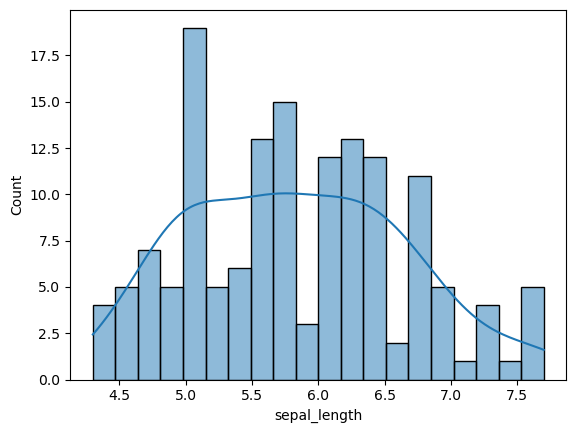

In [11]:
sb.histplot(Iris['sepal_length'], kde=True, bins=20)

# Help from ChatGPT
I plot the Histogram using the Seaborn library. In the command, sns.kdeplot(Iris['sepal_length']), what the kde mean?

### Compare the Distributions

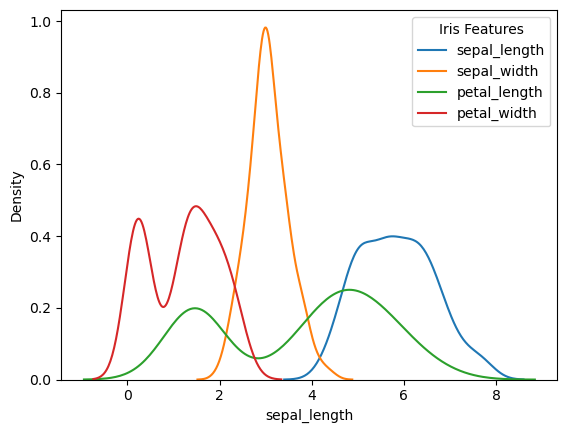

In [12]:
sb.kdeplot(Iris['sepal_length'])
sb.kdeplot(Iris['sepal_width'])
sb.kdeplot(Iris['petal_length'])
sb.kdeplot(Iris['petal_width'])

import matplotlib.pyplot as plt
plt.legend(title='Iris Features', loc='upper right', labels=['sepal_length', 'sepal_width','petal_length','petal_width'])

### Compare Distribution for each Flower Type

<Axes: xlabel='species', ylabel='petal_length'>

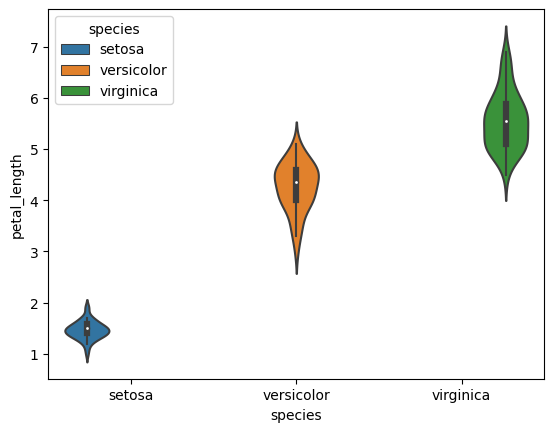

In [17]:
sb.violinplot(x='species', y='petal_length', data=Iris, hue='species')

### Check Correlation and Distribution between each Pair of Features

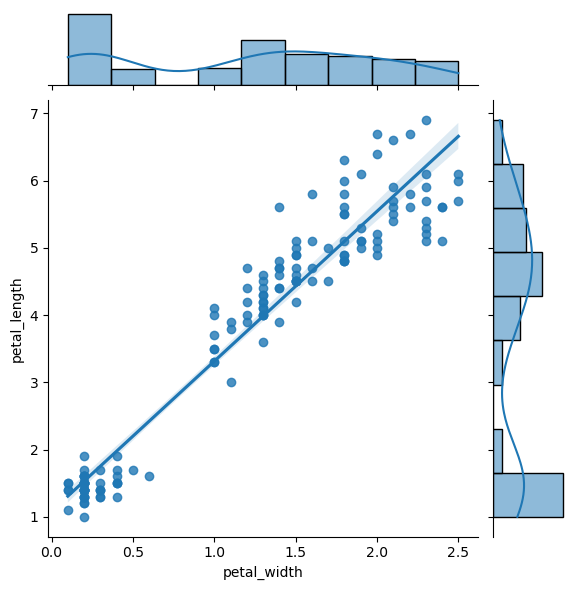

In [13]:
sb.jointplot(x='petal_width' , y='petal_length' , data=Iris, kind='reg')

### Check Distribution between each Pair of Features

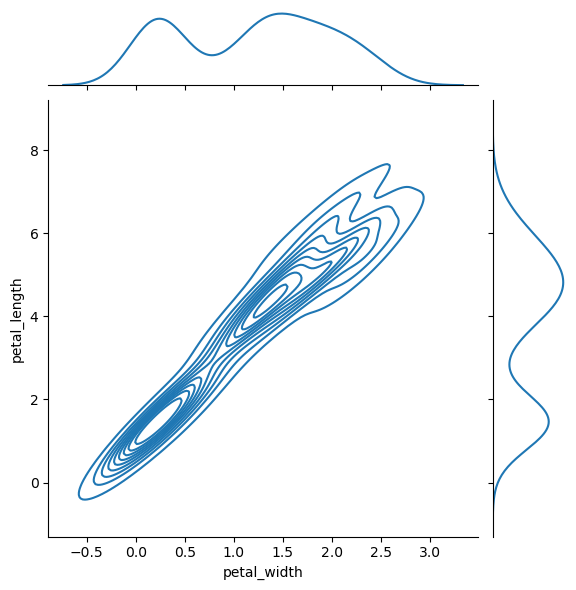

In [14]:
sb.jointplot(x='petal_width' , y='petal_length' , data=Iris, kind='kde')

# Data Preprocessing

In [15]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Help from ChatGPT
How can I remove the NaN rows from the Iris dataset.

In [16]:
Iris.dropna(inplace=True)

## Input and Output

In [17]:
X = Iris.iloc[:, :-1].values
y = Iris.iloc[:, -1].values

In [18]:
# A Quick check to make sure...
pd.DataFrame(y)

,0
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
143,virginica
144,virginica
145,virginica
146,virginica


## Categorical Data
For label data (y in this case the type of flowers) always use LabelEncoder

In [19]:
from sklearn.preprocessing import LabelEncoder
LaEnc = LabelEncoder()
y = LaEnc.fit_transform(y)

In [20]:
# A quick check to make sure ....
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Splitting the Dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 , random_state = 0)

In [22]:
# A quick check to make sure ...
pd.DataFrame(y_train)

,0
0,0
1,1
2,0
3,2
4,1
...,...
113,0
114,2
115,1
116,2


## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### <font color=red> Wait!!!<br>👀
##### <font color=blue> Why we use fit_transform() on training data but transform() on the test data? 😕 <br>
We call fit_transform() method on our training data and transform() method on our test data. But the actual question is why do we do this? <br>
For example, when we are building a k-Nearest Neighbor model and we have to scale our features. The most common way to scale the features is through scikit-learn’s StandardScaler class.<br>
Recall, Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.<br>
In sklearn.preprocessing.StandardScaler(), fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.<br>
So what actually is happening here! 🤔<br>
The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.<br>
Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case. <br>
Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.<br>
Now the question is why we did this? 🙃<br>
Here is the simple logic behind it!<br>
If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.<br>
This is the standard procedure to scale our data while building a machine learning model so that our model is not biased towards a particular feature of the dataset and at the same time prevents our model to learn the features/values/trends of our test data.<br>
##### <font color=blue> In summary, we always apply fit_transform(X_train) to the training data, and only transform(X_test) to the test data. <br>
Still Confused: Read more here: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
    
By the way, you can copy emojis from https://getemoji.com/, and paste on Markdown cells ⚙️ <br>

##### <font color='magenta'> Now, our data is ready to go through Classifiers ....  🤠<br>

In [24]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    float64
 4   species       148 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


# Classification

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<font color=red> Note: <font color=black>"minkowski" with p=2 is equivalent to the standard Euclidean metric.
In ML, we can use differnt distances, the typical one are:<br>

Manhattan: The straight distance <br>
Euclidean: p=2 <br>
Chebyshev: p=∞ <br>
Minkowski: p= any other numbers <br>

The most common is the Euclidean<br>

If you are interested in, you may read more on this topic here:<br>
https://rittikghosh.com/Minkowski_distance.html

# Accuracy of the Model on Trainset

In [26]:
y_train_pred = KNNclassifier.predict(X_train)

In [27]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on the training set:", train_accuracy)

Accuracy on the training set: 0.9830508474576272


## Comparing the Predicted with Actual Results of Test Set

In [28]:
y_pred = KNNclassifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,2,0,0,0,1,2,1,...,0,2,1,1,1,0,2,2,1,2
1,0,0,0,2,0,0,0,1,2,1,...,0,2,1,1,1,0,2,2,1,2


## Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Your Model Accuracy is= 96.66666666666667 %


##### <font color=red> Confusion Matrix <br>
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
I will review this during the lecture. If you are interested in learning more, this linke is a good source: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

## SVM

In [55]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel = 'rbf', random_state = 0)
SVMclassifier.fit(X_train, y_train)

SVC(random_state=0)

<font color=blue> As explianed during the lecture, you may try different Kernels such as:<br>
    - Polynomial Kernel<br>
    - Gaussian Radial Basis Function (RBF) Kernel<br>
    - Linear Kernel,<br>
    - sigmoid Kernel,<br>

classifier = SVC(kernel = 'poly',degree=3)<br>
classifier = SVC(kernel = 'linear') <br>
classifier = SVC(kernel = 'sigmoid') <br>
classifier = SVC(kernel = 'rbf')


In [56]:
y_pred = SVMclassifier.predict(X_test)

## Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Your Model Accuracy is= 96.66666666666667 %


In [ ]:
# You can use the same appraoch and use this one to predict...

## Naive Bayes 

In [58]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

GaussianNB()

<font color=magenta> (Optional) We covered Naive Bayes during the lecture. In this short video on this link you can learn more details on Gaussian Naive bayes:
    https://www.youtube.com/watch?v=H3EjCKtlVog
    

In [59]:
y_pred = NBclassifier.predict(X_test)

## Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]
Your Model Accuracy is= 100.0 %


## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
Treeclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<font color=red> Note: <font color=black>
A tree is composed of nodes, and those nodes are chosen looking for the optimum split of the features. For that purpose, different criteria exist. In the decision tree Python implementation of the scikit-learn library, this is made by the parameter ‘criterion‘. This parameter is the function used to measure the quality of a split and it allows users to choose between ‘gini‘ or ‘entropy‘.<br>
How does each criterion find the optimum split? And, what are the differences between both of them? <br>
This is beyond the scope of this course; but you may read all the details you need to know here from this link:
https://quantdare.com/decision-trees-gini-vs-entropy/

In [62]:
y_pred = Treeclassifier.predict(X_test)

## Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Your Model Accuracy is= 96.66666666666667 %


## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
Forestclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Forestclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

<font color=red> How many trees in the Random Forest?: <font color=black>
The optimal number of trees in the Random Forest depends on the number of rows in the data set. The more rows in the data, the more trees are needed <br>
This is beyond the scope of this course; but you may read all the details you need to know here from this link:
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [65]:
y_pred = Forestclassifier.predict(X_test)

## Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Your Model Accuracy is= 96.66666666666667 %


# Conclusion
We tried 4 Models (KNN< SVM, Naive B, Tree and Forest), and all gave a perfect accuracy. We can use one of them for prediction.👌

# Use the Model to Predict
Now, suppose, you go out, find out an Iris Flower, have no idea what type it is! You take out your ruler, and make 4 simple measurements:
* Sepal_Length
* Sepal_Width
* Petal_Length
* Petal_Width
And use your model to figure out the type! 
![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [67]:
#YourMeasurement= [[5.1,3.5,1.4,0.2]]
#YourMeasurement= [[7,3.2,4.7,1.4]]
YourMeasurement= [[6.7,2.5,5.8,1.8]]

# We can use any of the above Classifier

Flower=NBclassifier.predict(sc.transform(YourMeasurement))

if Flower==0:
    print("This is Setosa")
elif Flower==1:
    print("This is Versicolor")
else:
    print("This is Virginica")

This is Virginica


##### End

# Part II

## XGBoost

# Help from ChatGPT
Perfect; Now I wish to use the XGBoost classifier for the Iris Flower dataset. Could you write me the code.

# Help from ChatGPT
If it says "No module named 'xgboost' " You need to install this library. 


1. Open Anaconda Prompt(On Windows, you can find "Anaconda Prompt" in the Start menu.) 
2. Run as Admin
3. Type: conda install xgboost

In [71]:
import xgboost as xgb

In [72]:
# Initialize and train the XGBoost classifier
xg_classifier = xgb.XGBClassifier(objective ='multi:softmax', num_class=3, random_state=42)
xg_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [74]:
# Predict the target values for the testing set
y_pred = xg_classifier.predict(X_test)

# Calculate the accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the testing set:", test_accuracy)

Accuracy on the testing set: 0.9666666666666667


# Help from ChatGPT
Perfect; Now, I run the XGBOOst. Could you explain in detail, but simple terms, how this method works, and what are its advantages; and how it is different than Decision Tree classifier. 

How XGBoost Works:
XGBoost stands for eXtreme Gradient Boosting. It's a powerful and efficient machine learning technique based on an ensemble of decision trees. Here's how it works:

Ensemble of Trees:

XGBoost combines several weaker prediction models, usually decision trees, to create a stronger predictive model.
Each tree in XGBoost is built sequentially, aiming to correct the errors of the previous one.
Gradient Boosting:

XGBoost uses a technique called gradient boosting, where each tree learns and corrects the mistakes of the previous tree.
It minimizes a loss function (e.g., mean squared error for regression, log loss for classification) by adding trees that reduce the error.
Regularization:

XGBoost includes regularization terms in the loss function to prevent overfitting. It penalizes complex models, encouraging simplicity.
This helps the model generalize better to unseen data.
Gradient Descent Optimization:

XGBoost uses gradient descent optimization to efficiently find the best parameters for each tree.
It iteratively updates the tree parameters in the direction of steepest decrease of the loss function.
Advantages of XGBoost:
High Performance:

XGBoost is known for its speed and performance. It's optimized for efficiency and scales well for large datasets.
Regularization:

It has built-in regularization techniques to prevent overfitting, making the model more robust.
Handling Missing Values:

XGBoost has a way to handle missing data, which is a common issue in real-world datasets.
Parallel Processing:

It can use all the CPU cores during training, making it faster compared to traditional gradient boosting implementations.
Flexibility:

Supports both regression and classification problems.
Can be used with different loss functions depending on the problem at hand.
How XGBoost Differs from Decision Tree:
Ensemble vs. Single Tree:

XGBoost is an ensemble model combining multiple decision trees, whereas a decision tree classifier is a standalone model.
Gradient Boosting vs. Single Pass:

XGBoost uses gradient boosting, training trees sequentially to correct errors, whereas a decision tree typically builds in a single pass.
Regularization:

XGBoost incorporates regularization to prevent overfitting, while decision trees can often overfit the training data.
Efficiency:

XGBoost is highly optimized and efficient, making it faster and more accurate in many cases compared to a single decision tree.
In summary, XGBoost is like a team of smart decision makers (trees) working together, learning from each other's mistakes, and using their combined knowledge to make accurate predictions. It's efficient, powerful, and handles complex tasks by leveraging the strength of many simpler models.